In [ ]:
from window import *
import rotB

if __name__ == "__main__":
    dim = (32,32,64)
    
    idx = np.indices(dim).astype(np.float32)  
    X = np.zeros(dim+(4,), dtype = np.float32)
    X[:,:,:,0] = idx[0,:,:,:] - dim[0]/2
    X[:,:,:,1] = idx[1,:,:,:] - dim[1]/2
    X[:,:,:,2] = idx[2,:,:,:] - dim[2]/2
    X[:,:,:,3] = 1.

    X1 = np.array(X)
    ar = (dim[0]/4)**2
    az = (dim[2]/4)**2
    h = np.exp(-((X[:,:,:,0])**2 + (X[:,:,:,1])**2)/ar - X[:,:,:,2]**2/az)*np.pi*2


    X[:,:,:,0] = ((X1[:,:,:,0])*np.cos(h) - (X1[:,:,:,1])*np.sin(h))#*(1.+np.cos(X[:,:,:,2]*np.pi/dim[2]))*0.5
    X[:,:,:,1] = ((X1[:,:,:,0])*np.sin(h) + (X1[:,:,:,1])*np.cos(h))#*(1.+np.cos(X[:,:,:,2]*np.pi/dim[2]))*0.5
                  #+ 16*np.cos(X[:,:,:,2]*np.pi/dim[2]))
    
    #X*= 0.015
    #X[:,0,:,1] -= 0.9*h
    
    B = np.zeros(dim+(4,), dtype = np.float32)
    B[:,:,:,2] = 1.
    B[:,:,:,3] = 1.
    #X*=0.01
    
    #X = (np.random.random(dim+(4,)).astype(np.float32) - 0.5)*0.3
    
    cle = rotB.Integrator(X, B, maxiter = 1e4)
    cle.start()
    

    
    window(cle, video_dir = '/video')


C:\Anaconda\lib\site-packages\pyopencl-2016.2-py2.7-win-amd64.egg\pyopencl\__init__.py:208: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


[ 0.  0.  0.  0.]


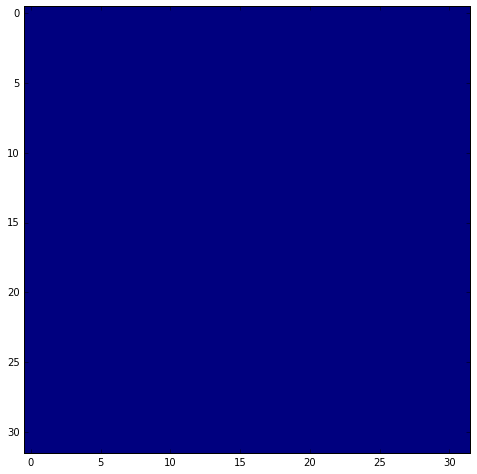

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(cle._Current[:,:,20,1], interpolation = 'nearest')
print cle._Current[14,14,20,:]